In [1]:
import pandas as pd
import numpy as np

import scipy.linalg as la

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
cohort = pd.read_csv('all_ftf_cohorts.csv')

C:\Users\mboissev\AppData\Local\Temp\ipykernel_15744\1905987153.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  cohort = pd.read_csv('all_ftf_cohorts.csv')


In [3]:
semesters = cohort.iloc[:,2:].columns
next_state = ['Graduated_Prob','Transferred_Out_Prob','Dropped_Out_Prob','Sabbatical_Prob','Freshman_Prob','Sophomore_Prob','Junior_Prob','Senior_Prob']
initial = ['Graduated','Transferred_Out','Dropped_Out','Sabbatical','Freshman','Sophmore','Junior','Senior']
cohort_states = cohort.iloc[:,2:]
cohort_states = cohort_states.rename(columns={'201150':0, '201230':1, '201240':2, '201250':3, '201330':4, '201340':5, '201350':6,
       '201430':7, '201440':8, '201450':9, '201530':10, '201540':11, '201550':12, '201630':13,
       '201640':14, '201650':15, '201730':16, '201740':17, '201750':18, '201830':19, '201840':20,
       '201850':21, '201930':22, '201940':23, '201950':24, '202030':25, '202040':26, '202050':27,
       '202130':28, '202140':29, '202150':30, '202230':31})
cohort_states

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,Freshman,Freshman,Freshman,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,...,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,NaN,NaN
1,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,...,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,NaN,NaN
2,Freshman,Freshman,Freshman,Freshman,Sabbatical,Sabbatical,Sabbatical,Sabbatical,Sabbatical,Transferred Out,...,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,NaN,NaN
3,Freshman,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,...,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,NaN,NaN
4,Freshman,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,...,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Freshman,Freshman,Freshman,Freshman,Freshman,Sophomore,Sophomore,Sophomore,Sophomore,Dropped Out
17559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Freshman,Sophomore,Sophomore,Sophomore,Sabbatical,Sabbatical,Sophomore,Sophomore,Sophomore,Junior
17560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out
17561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Junior,Junior,Junior,Senior,Senior,Sabbatical,Sabbatical,Senior,Sabbatical,Sabbatical


In [4]:
# Create indidvidual transition Dataframes 
# Dataframe name is the starting state transition probabilities are probability of next state in each semester

Graduated_df = pd.DataFrame(columns = semesters, index = next_state)
Transferred_df = pd.DataFrame(columns = semesters, index = next_state)
Dropped_df = pd.DataFrame(columns = semesters, index = next_state)
Sabbatical_df = pd.DataFrame(columns = semesters, index = next_state)
Freshman_df = pd.DataFrame(columns = semesters, index = next_state)
Sophomore_df = pd.DataFrame(columns = semesters, index = next_state)
Junior_df = pd.DataFrame(columns = semesters, index = next_state)
Senior_df = pd.DataFrame(columns = semesters, index = next_state)

In [5]:
cohort_states.shape

(17563, 32)

In [6]:
# Run through the dataframe and add 1 to every current states next state

for x in range(cohort_states.shape[1]-1):
    
    # Create a dictionary of states each state could change into and reset to zero on every new row

    Graduated = {'Graduated' : 0,'Transferred Out' : 0,'Dropped Out' : 0,
         'Sabbatical' : 0,'Freshman' : 0,'Sophomore' : 0,
            'Junior' : 0,'Senior': 0}

    Transferred_Out = {'Graduated' : 0,'Transferred Out' : 0,'Dropped Out' : 0,
         'Sabbatical' : 0,'Freshman' : 0,'Sophomore' : 0,
            'Junior' : 0,'Senior': 0}

    Dropped_Out = {'Graduated' : 0,'Transferred Out' : 0,'Dropped Out' : 0,
         'Sabbatical' : 0,'Freshman' : 0,'Sophomore' : 0,
            'Junior' : 0,'Senior': 0}

    Sabbatical = {'Graduated' : 0,'Transferred Out' : 0,'Dropped Out' : 0,
         'Sabbatical' : 0,'Freshman' : 0,'Sophomore' : 0,
            'Junior' : 0,'Senior': 0}

    Freshman = {'Graduated' : 0,'Transferred Out' : 0,'Dropped Out' : 0,
         'Sabbatical' : 0,'Freshman' : 0,'Sophomore' : 0,
            'Junior' : 0,'Senior': 0}

    Sophomore = {'Graduated' : 0,'Transferred Out' : 0,'Dropped Out' : 0,
         'Sabbatical' : 0,'Freshman' : 0,'Sophomore' : 0,
            'Junior' : 0,'Senior': 0}

    Junior = {'Graduated' : 0,'Transferred Out' : 0,'Dropped Out' : 0,
         'Sabbatical' : 0,'Freshman' : 0,'Sophomore' : 0,
            'Junior' : 0,'Senior': 0}

    Senior = {'Graduated' : 0,'Transferred Out' : 0,'Dropped Out' : 0,
         'Sabbatical' : 0,'Freshman' : 0,'Sophomore' : 0,
            'Junior' : 0,'Senior': 0}

    for y in range(cohort_states.shape[0]):
        if pd.isnull(cohort_states[x][y]):
            continue
        elif pd.isnull(cohort_states[x+1][y]):
            continue
        elif cohort_states[x][y] == 'Graduated':
            Graduated[cohort_states[x+1][y]] += 1

        elif cohort_states[x][y] == 'Transferred Out':
            Transferred_Out[cohort_states[x+1][y]] += 1

        elif cohort_states[x][y] == 'Dropped Out':
            Dropped_Out[cohort_states[x+1][y]] += 1 

        elif cohort_states[x][y] == 'Sabbatical':
            Sabbatical[cohort_states[x+1][y]] += 1

        elif cohort_states[x][y] == 'Freshman':
            Freshman[cohort_states[x+1][y]] += 1

        elif cohort_states[x][y] == 'Sophomore':
            Sophomore[cohort_states[x+1][y]] += 1

        elif cohort_states[x][y] == 'Junior':
            Junior[cohort_states[x+1][y]] += 1

        elif cohort_states[x][y] == 'Senior':
            Senior[cohort_states[x+1][y]] += 1
    

    # Change that value into a probability
    if sum(Graduated.values()) != 0:
        Graduated_Prob = []
        for z in Graduated.values():
            Graduated_Prob.append(round(z / sum(Graduated.values()),4))
        Graduated_df.iloc[:, x:x+1] = pd.DataFrame(Graduated_Prob)

    if sum(Transferred_Out.values()) != 0:
        Transferred_Out_Prob = []
        for z in Transferred_Out.values():
            Transferred_Out_Prob.append(round(z / sum(Transferred_Out.values()),4))
        Transferred_df.iloc[:, x:x+1] =pd.DataFrame(Transferred_Out_Prob)
        
    if sum(Dropped_Out.values()) != 0:
        Dropped_Out_Prob = []
        for z in Dropped_Out.values():
            Dropped_Out_Prob.append(round(z / sum(Dropped_Out.values()),4))
        Dropped_df.iloc[:, x:x+1] = pd.DataFrame(Dropped_Out_Prob)
    
    if sum(Sabbatical.values()) != 0:
        Sabbatical_Prob = []
        for z in Sabbatical.values():
            Sabbatical_Prob.append(round(z / sum(Sabbatical.values()),4))
        Sabbatical_df.iloc[:, x:x+1] = pd.DataFrame(Sabbatical_Prob)

    if sum(Freshman.values()) != 0:
        Freshman_Prob = []
        for z in Freshman.values():
            Freshman_Prob.append(round(z / sum(Freshman.values()),4))
        Freshman_df.iloc[:, x:x+1] = pd.DataFrame(Freshman_Prob)

    if sum(Sophomore.values()) != 0:
        Sophomore_Prob = []
        for z in Sophomore.values():
            Sophomore_Prob.append(round(z / sum(Sophomore.values()),4))
        Sophomore_df.iloc[:, x:x+1] = pd.DataFrame(Sophomore_Prob)

    if sum(Graduated.values()) != 0:
        Junior_Prob = []
        for z in Junior.values():
            Junior_Prob.append(round(z / sum(Junior.values()),4))
        Junior_df.iloc[:, x:x+1] = pd.DataFrame(Junior_Prob)

    if sum(Graduated.values()) != 0:
        Senior_Prob = []
        for z in Senior.values():
            Senior_Prob.append(round(z / sum(Senior.values()),4))
        Senior_df.iloc[:, x:x+1] = pd.DataFrame(Senior_Prob)

In [7]:
Sabbatical_df

,201150,201230,201240,201250,201330,201340,201350,201430,201440,201450,...,201930,201940,201950,202030,202040,202050,202130,202140,202150,202230
Graduated_Prob,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005,0.005,0.0081,0.0138,0.0027,0.0162,0.009,0.0095,0.0043,NaN
Transferred_Out_Prob,NaN,0.0485,0.0775,0.1075,0.0483,0.1034,0.082,0.0307,0.1144,0.1135,...,0.0245,0.1445,0.1431,0.0384,0.1729,0.1633,0.0775,0.2229,0.2809,NaN
Dropped_Out_Prob,NaN,0.0097,0.0258,0.0239,0.0017,0.0226,0.0307,0.0077,0.0227,0.0259,...,0.0065,0.0459,0.0519,0.0079,0.0525,0.0742,0.0108,0.0838,0.3149,NaN
Sabbatical_Prob,NaN,0.8981,0.8191,0.7075,0.9135,0.7872,0.7672,0.9179,0.7782,0.7362,...,0.9301,0.6683,0.6592,0.8867,0.6434,0.5412,0.8288,0.4076,0.1702,NaN
Freshman_Prob,NaN,0.0388,0.0749,0.1493,0.0349,0.0702,0.0761,0.0285,0.0576,0.0735,...,0.0122,0.0578,0.0411,0.0148,0.038,0.0418,0.009,0.0781,0.0255,NaN
Sophomore_Prob,NaN,0.0049,0.0026,0.009,0.0017,0.0155,0.0439,0.0099,0.0253,0.0432,...,0.0101,0.0484,0.0394,0.0069,0.0489,0.085,0.0126,0.0876,0.0638,NaN
Junior_Prob,NaN,0.0,0.0,0.003,0.0,0.0012,0.0,0.0055,0.0009,0.0043,...,0.0072,0.0176,0.0331,0.0197,0.0281,0.0472,0.0342,0.0705,0.0809,NaN
Senior_Prob,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0009,0.0032,...,0.0043,0.0126,0.0242,0.0118,0.0136,0.031,0.018,0.04,0.0596,NaN


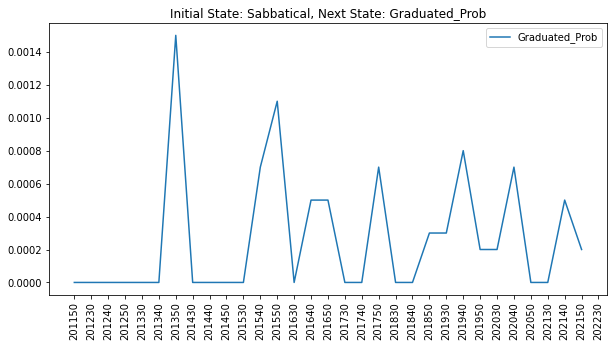

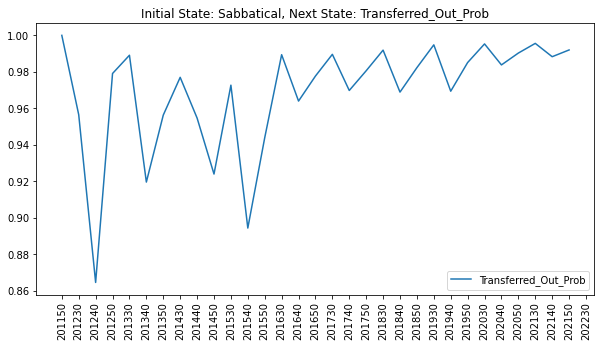

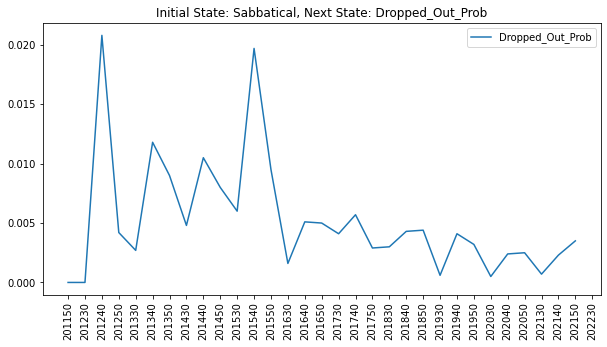

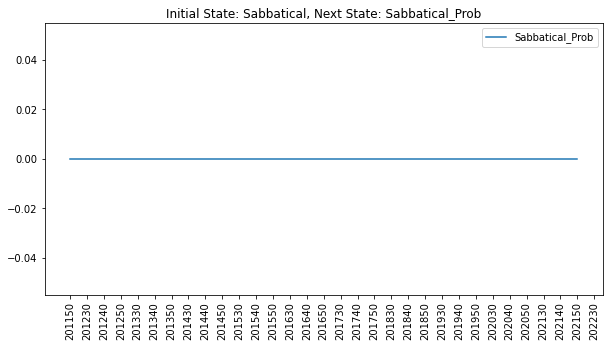

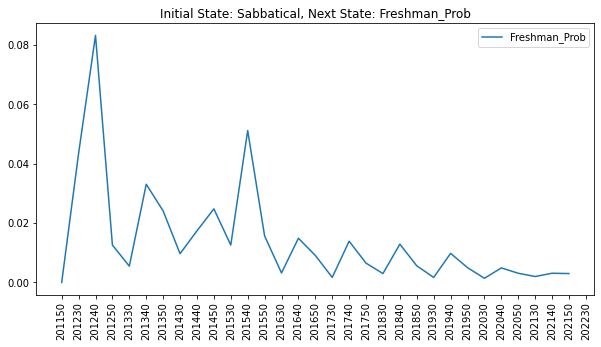

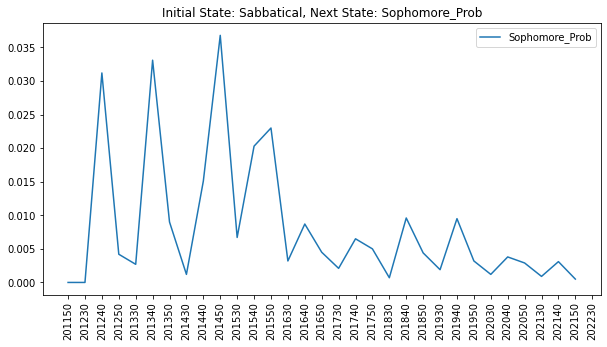

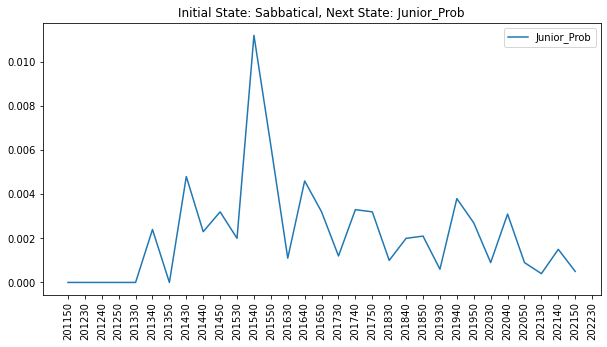

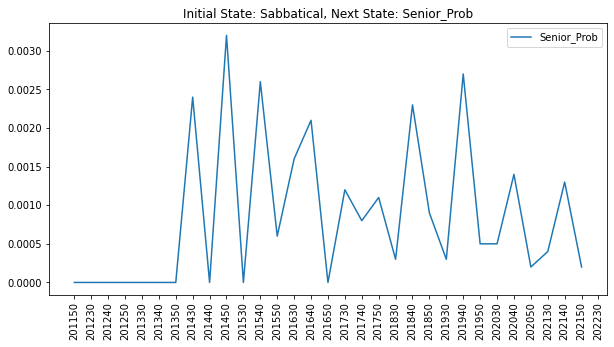

In [8]:
for col in Sabbatical_df.T.columns:
    plt.figure(figsize=(10,5))
    plt.plot(Transferred_df.T[col], label = col)
    plt.legend()
    plt.xticks(rotation=90)
    plt.title(f'Initial State: Sabbatical, Next State: {col}')
    plt.show()

In [9]:
Sabbatical_df.sum()

201150         0
201230       1.0
201240    0.9999
201250    1.0002
201330    1.0001
201340    1.0001
201350    0.9999
201430    1.0002
201440       1.0
201450    0.9998
201530       1.0
201540    1.0001
201550    1.0001
201630    1.0001
201640       1.0
201650       1.0
201730       1.0
201740       1.0
201750    1.0001
201830    1.0001
201840    0.9999
201850       1.0
201930    0.9999
201940    1.0001
201950    1.0001
202030       1.0
202040    1.0001
202050    0.9999
202130    0.9999
202140       1.0
202150    1.0001
202230         0
dtype: object

In [19]:
Freshman_df.head()

,201150,201230,201240,201250,201330,201340,201350,201430,201440,201450,...,201930,201940,201950,202030,202040,202050,202130,202140,202150,202230
Graduated_Prob,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0048,0.0,0.0,0.0,0.0,NaN
Transferred_Out_Prob,0.0339,0.012,0.0942,0.0321,0.014,0.0951,0.0386,0.0092,0.143,0.0714,...,0.0068,0.0985,0.0331,0.0078,0.0766,0.0244,0.0133,0.0308,0.0,NaN
Dropped_Out_Prob,0.0854,0.0047,0.063,0.075,0.0034,0.0705,0.0611,0.0057,0.0619,0.0612,...,0.0057,0.0919,0.1084,0.0078,0.1627,0.1301,0.04,0.3231,0.5672,NaN
Sabbatical_Prob,0.1028,0.131,0.0128,0.1231,0.1368,0.013,0.1194,0.1267,0.0137,0.1152,...,0.0918,0.0079,0.1279,0.1445,0.0287,0.1789,0.0533,0.0462,0.0597,NaN
Freshman_Prob,0.7469,0.8302,0.68,0.6032,0.8071,0.617,0.5887,0.8148,0.5759,0.5587,...,0.8436,0.4947,0.2169,0.7344,0.2871,0.2439,0.6933,0.2154,0.1791,NaN


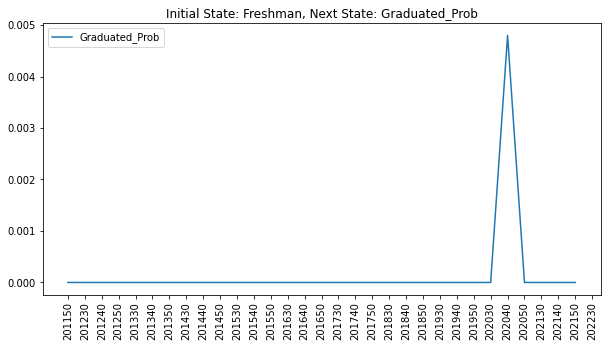

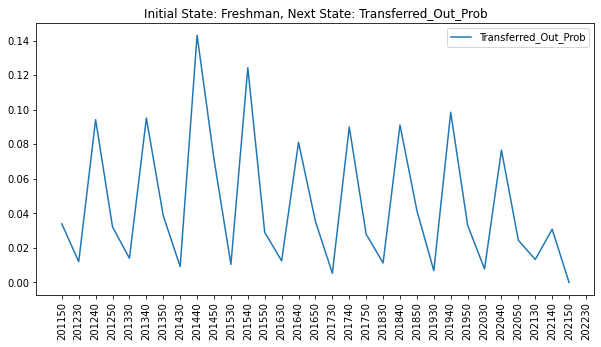

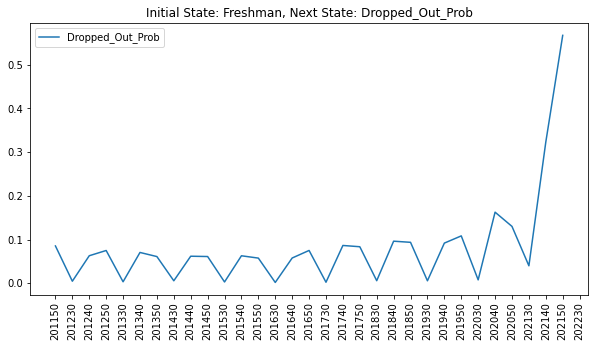

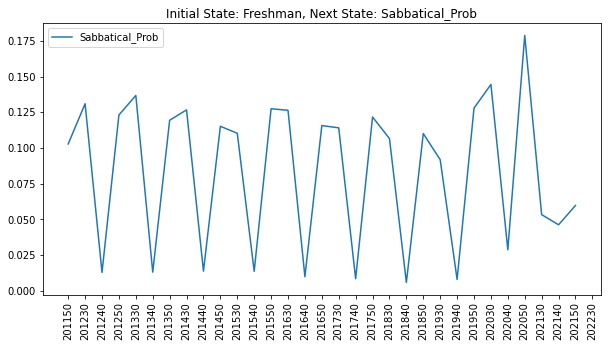

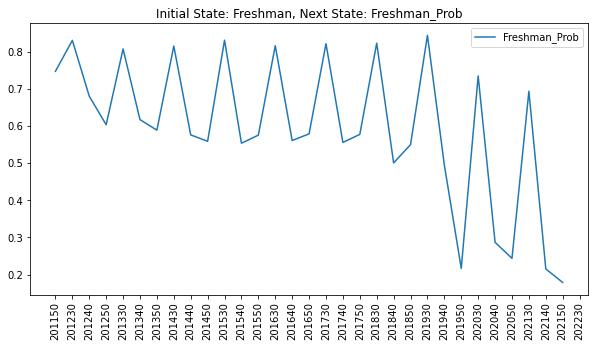

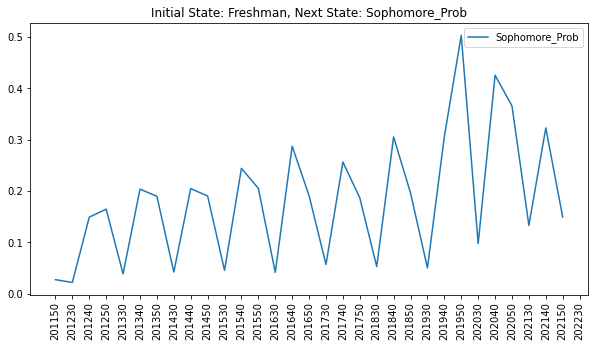

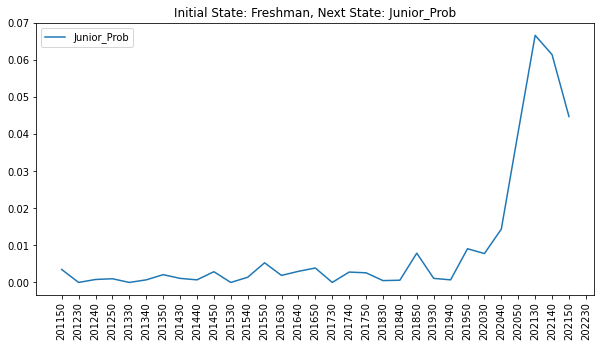

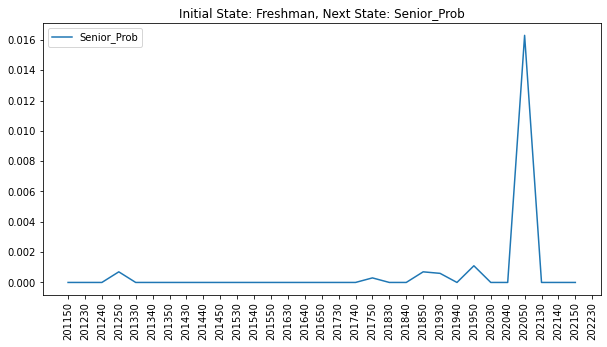

In [11]:
for col in Freshman_df.T.columns:
    plt.figure(figsize=(10,5))
    plt.plot(Freshman_df.T[col], label = col)
    plt.legend()
    plt.xticks(rotation=90)
    plt.title(f'Initial State: Freshman, Next State: {col}')
    plt.show()

In [12]:
Freshman_df.sum()

201150       1.0
201230       1.0
201240       1.0
201250       1.0
201330       1.0
201340    1.0001
201350    0.9999
201430    0.9999
201440       1.0
201450       1.0
201530       1.0
201540    1.0001
201550       1.0
201630    1.0001
201640       1.0
201650    0.9999
201730    1.0001
201740       1.0
201750       1.0
201830       1.0
201840    0.9999
201850       1.0
201930       1.0
201940    0.9999
201950    0.9999
202030       1.0
202040    1.0001
202050    1.0002
202130    0.9999
202140    1.0001
202150    1.0001
202230         0
dtype: object

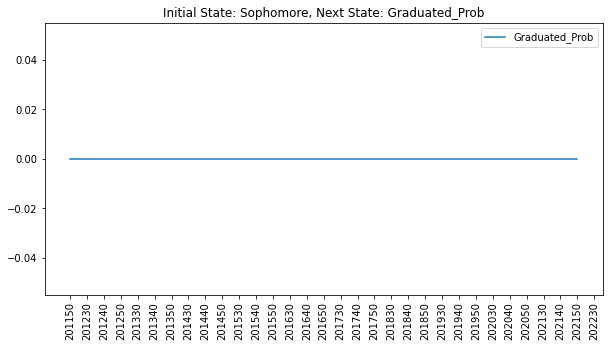

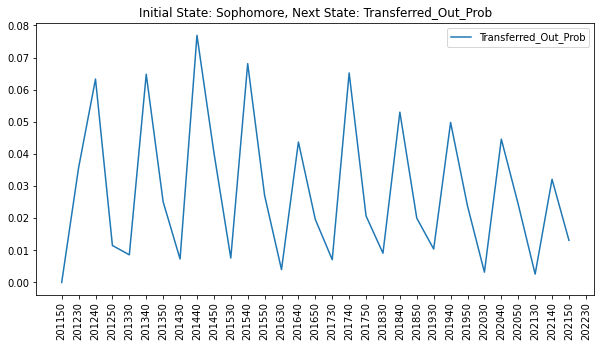

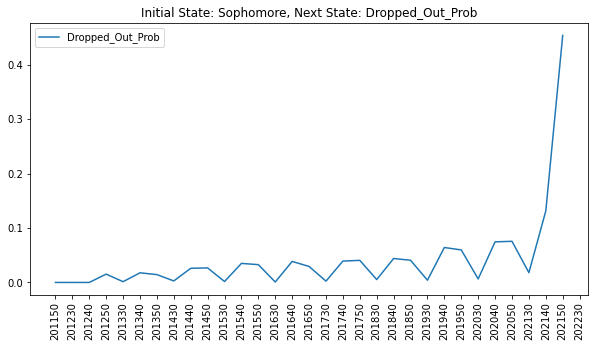

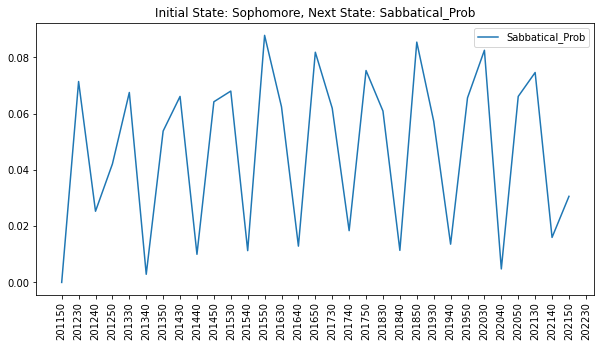

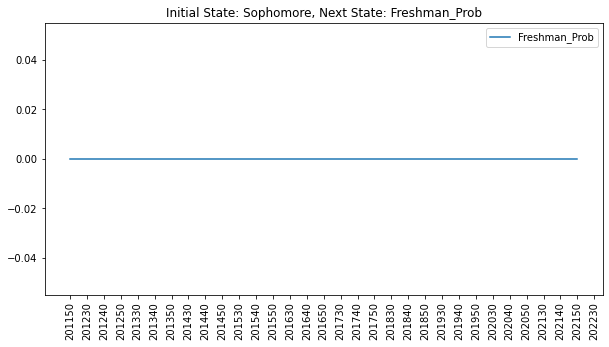

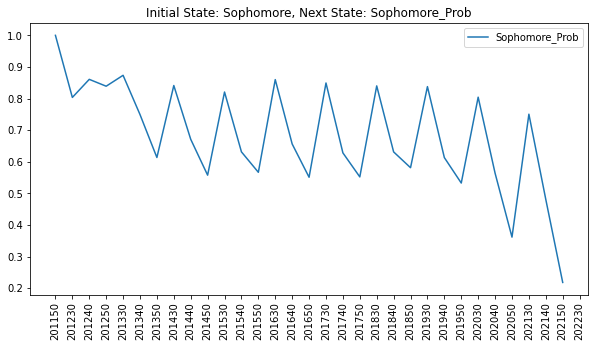

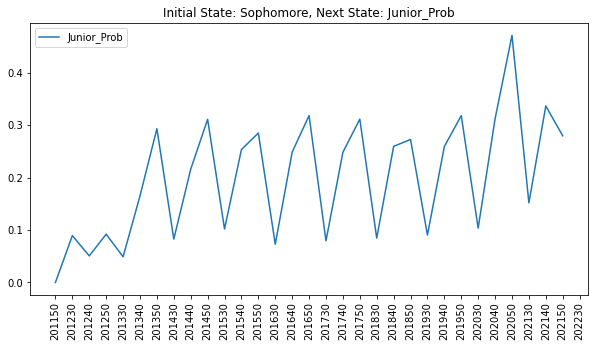

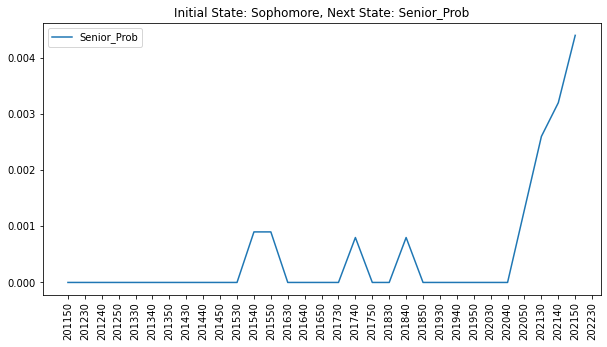

In [13]:
for col in Sophomore_df.T.columns:
    plt.figure(figsize=(10,5))
    plt.plot(Sophomore_df.T[col], label = col)
    plt.legend()
    plt.xticks(rotation=90)
    plt.title(f'Initial State: Sophomore, Next State: {col}')
    plt.show()

In [14]:
Sophomore_df.sum()

201150       1.0
201230       1.0
201240       1.0
201250       1.0
201330       1.0
201340    0.9999
201350       1.0
201430    1.0001
201440       1.0
201450    1.0001
201530       1.0
201540       1.0
201550    1.0001
201630       1.0
201640    1.0001
201650       1.0
201730       1.0
201740       1.0
201750    1.0001
201830    0.9999
201840    0.9999
201850       1.0
201930       1.0
201940       1.0
201950       1.0
202030    1.0001
202040       1.0
202050       1.0
202130    1.0001
202140       1.0
202150       1.0
202230         0
dtype: object

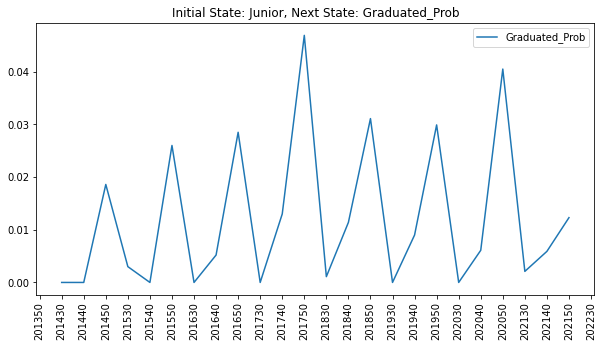

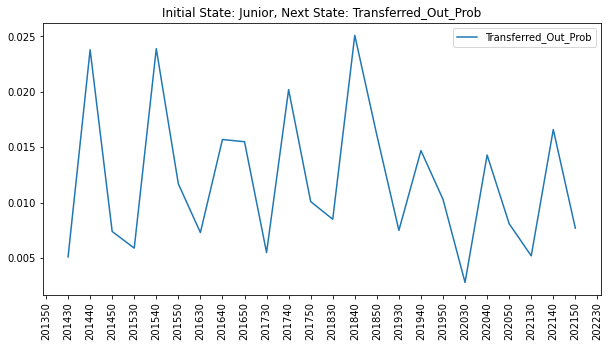

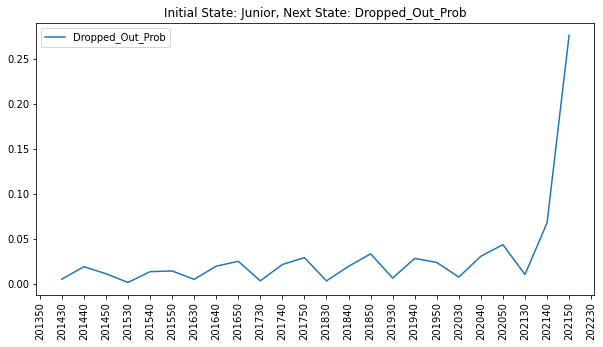

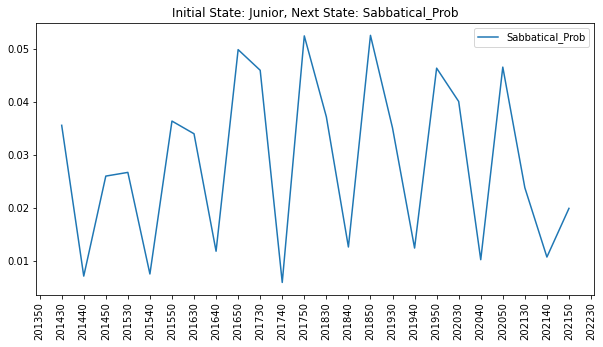

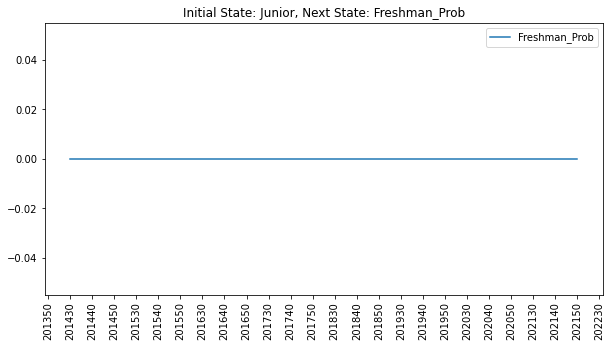

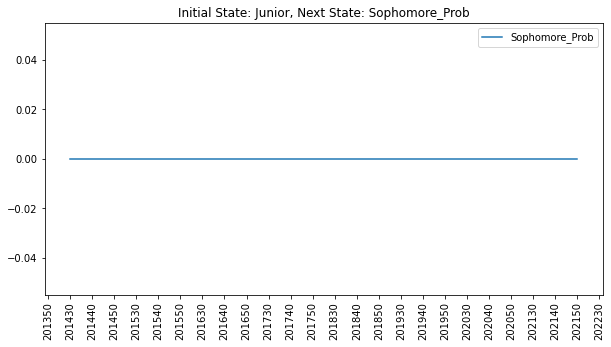

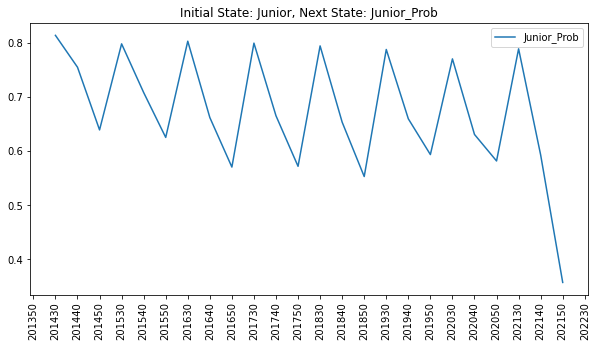

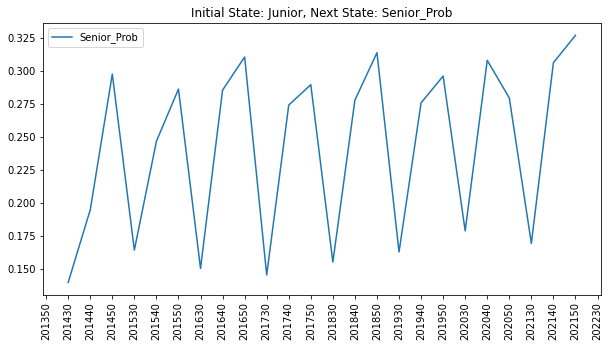

In [15]:
for col in Junior_df.T.columns:
    plt.figure(figsize=(10,5))
    plt.plot(Junior_df.T[col], label = col)
    plt.legend()
    plt.xticks(rotation=90)
    plt.title(f'Initial State: Junior, Next State: {col}')
    plt.show()

In [16]:
Junior_df.sum()

201150         0
201230         0
201240         0
201250         0
201330         0
201340         0
201350         0
201430    0.9999
201440       1.0
201450       1.0
201530       1.0
201540       1.0
201550       1.0
201630    1.0001
201640    0.9999
201650    0.9999
201730    1.0001
201740       1.0
201750    1.0001
201830       1.0
201840    0.9999
201850    0.9999
201930       1.0
201940    0.9999
201950       1.0
202030       1.0
202040       1.0
202050    1.0001
202130    1.0001
202140    0.9999
202150    1.0001
202230         0
dtype: object

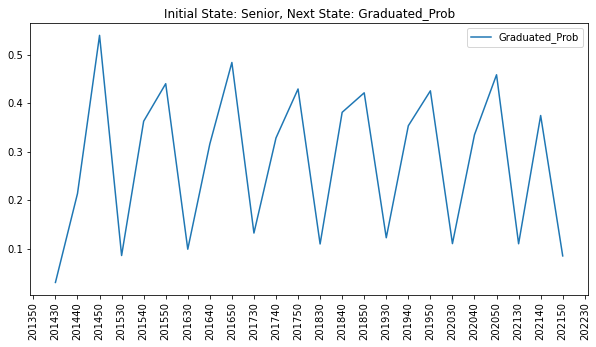

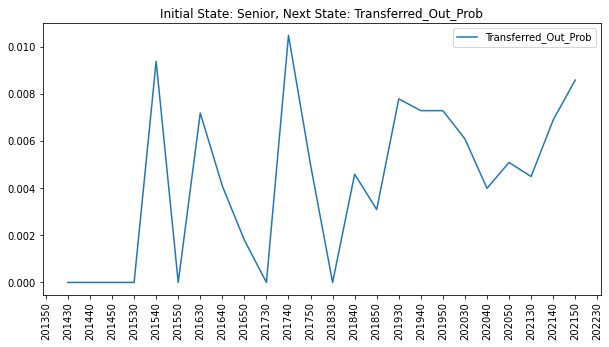

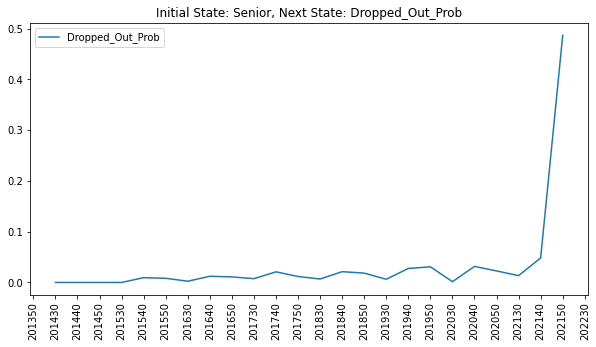

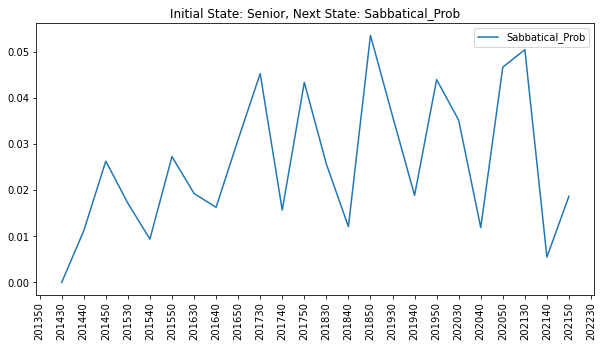

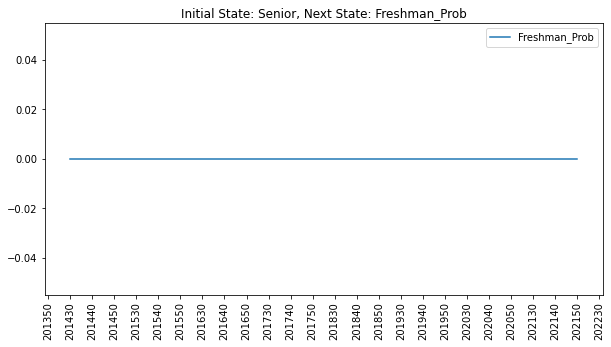

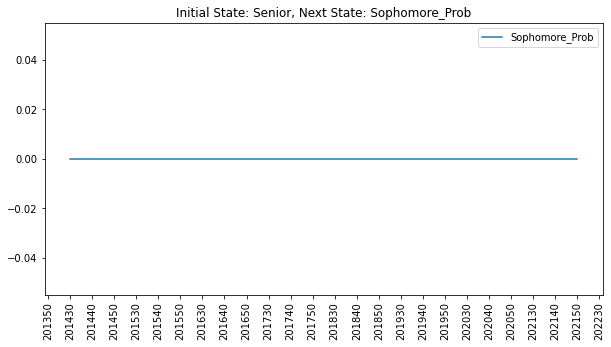

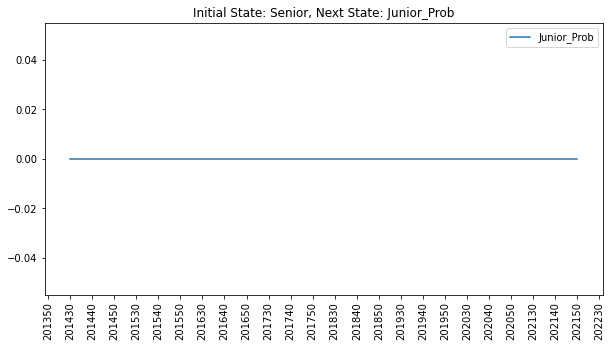

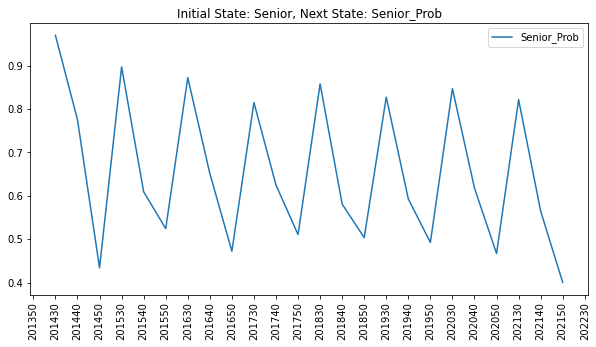

In [17]:
for col in Senior_df.T.columns:
    plt.figure(figsize=(10,5))
    plt.plot(Senior_df.T[col], label = col)
    plt.legend()
    plt.xticks(rotation=90)
    plt.title(f'Initial State: Senior, Next State: {col}')
    plt.show()

In [18]:
Senior_df.sum()

201150         0
201230         0
201240         0
201250         0
201330         0
201340         0
201350         0
201430       1.0
201440       1.0
201450       1.0
201530       1.0
201540    1.0001
201550       1.0
201630       1.0
201640       1.0
201650    0.9999
201730       1.0
201740       1.0
201750       1.0
201830       1.0
201840       1.0
201850       1.0
201930    0.9999
201940       1.0
201950       1.0
202030       1.0
202040    1.0001
202050       1.0
202130    1.0001
202140    0.9999
202150    0.9999
202230         0
dtype: object